In [5]:
import json
import sys
import pandas as pd
import numpy as np

from scipy import stats

#data = sys.stdin.read()

data_dict = data = [
{"supplier_name": 'PaaS 8',"service_availability": 8, "data_and_system_hosting": 8, "data_security_controls": 9},
{"supplier_name": 'Identity CSP',"service_availability": 7, "data_and_system_hosting": 9, "data_security_controls": 8},
{"supplier_name": 'Billing CSP',"service_availability": 8, "data_and_system_hosting": 7, "data_security_controls": 8}
]

data = json.dumps(data)

#df = pd.read_json(json_data)
df = pd.read_json(data).set_index('supplier_name')

calculate_zscore_of_data = df.apply(stats.zscore, ddof=1)
#k = calculate_zscore_of_data.mean()

k = np.mean(calculate_zscore_of_data)

calculate_zscore_of_data = calculate_zscore_of_data.assign(average_my_zscore=pd.Series(k).values)

data_with_index_reset = calculate_zscore_of_data.reset_index()

response_data = data_with_index_reset.to_json(orient='records')

print('zscores' + ' ' + str(response_data) )


zscores [{"supplier_name":"PaaS 8","data_and_system_hosting":0.0,"data_security_controls":1.1547005384,"service_availability":0.5773502692,"average_my_zscore":0.0},{"supplier_name":"Identity CSP","data_and_system_hosting":1.0,"data_security_controls":-0.5773502692,"service_availability":-1.1547005384,"average_my_zscore":-0.0},{"supplier_name":"Billing CSP","data_and_system_hosting":-1.0,"data_security_controls":-0.5773502692,"service_availability":0.5773502692,"average_my_zscore":-5.181040782e-16}]


random_num_for_prob_without_ce [2.72271417e-02 1.72972859e-02 4.37478005e-02 3.50474205e-03
 1.49252937e-02 3.78180378e-02 4.41264962e-02 3.53490911e-02
 2.93936138e-02 4.74217912e-03 4.67587178e-04 1.24899202e-02
 3.51753544e-02 1.75388437e-02 5.01205561e-03 4.16727354e-02
 6.27692772e-03 3.06687980e-02 4.69760316e-02 4.59730594e-02
 2.23515344e-03 3.83043441e-02 1.73282496e-02 1.49867008e-02
 2.39878901e-04 4.51245412e-02 4.05737282e-02 3.82699131e-02
 1.46345168e-02 1.61253001e-02 1.40215905e-02 3.89232460e-02
 3.75432075e-03 4.95320403e-02 2.98136595e-02 3.11719029e-02
 2.17651271e-04 1.86715996e-02 1.53510781e-02 1.76970455e-02
 4.99527635e-02 2.17897098e-02 1.36907261e-02 4.22526460e-02
 4.33352284e-02 7.04354678e-03 3.22201009e-02 2.40546098e-02
 4.06276625e-02 3.64417468e-02 4.45530735e-02 3.60980353e-02
 2.85698055e-02 2.08547379e-03 1.10437110e-02 2.99784187e-02
 4.15374715e-02 2.91280491e-02 4.97886701e-02 3.92762940e-02
 3.56281600e-02 3.78510173e-02 4.50357082e-02 1.366402

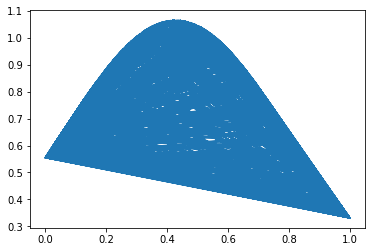

prob_with_ce [0.59502245 0.99989645 0.97858181 0.997659   0.21240734 0.99912568
 0.96328232 0.99158859 0.42622923 0.47683682]
impart random [411931 372967 409960  89560 392186 187011 203834 372234 592235  95630
 311506 163576 589473 615712  45742  92687   8762 138929 316085 605564
 417715 253486 277853 297202 353541 261873 432307  77731 173797 597053
 240964 231516  80669  13284 300630 157919 278823  20393 312078 102472
 295680 451696 583965 393445 409914 383922 312009 122074 350053 206836
 524033 584878 449834 542382 414531 324397 582542  71507 535056 367379
 198669 316531  10428 537008 328200 592723 222302 250328 403482 388953
 183016 592866 511145  71345 506367 308401  28342 608347 314020 253584
 295382 524573 407111 533571 180391  91829 551360 258459 133840 194856
 575377 464232 239649 285731 306716 493349 397152 153644 479420 558774]
impact intermediate 248333.33333333334
impact pert [9.07076034e-01 8.43948519e-01 9.04344788e-01 7.60272046e-02
 8.77502405e-01 3.31660379e-01 3.8439

In [3]:
#https://github.com/NAVADMC/ADSM/issues/331#issuecomment-133486023
import scipy
from scipy import stats
from scipy.stats import beta
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

random_num_for_prob_without_ce = np.random.uniform(low=0, high=0.05, size=1000)
print ('random_num_for_prob_without_ce' + ' ' + str(random_num_for_prob_without_ce) )

#prob_without_ce from expert 1
min = 0
mode = 0.03
max = 0.05

d = (min + 4*mode + max)/6
#print d
alpha = 6*((d - min)/(max - min))
beta = 6*((max - d)/(max - min))

location = min
scale = max - min

prob_without_ce = scipy.stats.beta.cdf(random_num_for_prob_without_ce, alpha,beta,location, scale)
print ('prob_without_ce' + ' ' + str(prob_without_ce))
mean = np.median(prob_without_ce)
std_dev = np.std(prob_without_ce)
print (format(mean, '.6f'))

plt.plot(prob_without_ce, norm.pdf(prob_without_ce, mean, std_dev))
plt.show()

#prob_with_ce from expert 1
random_num_for_prob_with_ce = np.random.uniform(low=0, high=0.03, size=10)
minn = 0
modee = 0.01
maxx = 0.03

dd = (minn + 4*modee + maxx)/6
alphaa = 6*((dd - minn)/(maxx - minn))
betaa = 6*((maxx - dd)/(maxx - minn))

locationa = minn
scalea = maxx - minn

prob_with_ce = scipy.stats.beta.cdf(random_num_for_prob_with_ce, alphaa,betaa,locationa, scalea)
print ('prob_with_ce' + ' ' + str(prob_with_ce))

#impact from expert 1
impact_random_numbers = np.random.randint(low=5000, high=625000, size=100)
#impact_random_numbers = np.random.randint(5000, 625000, size=100)

print ('impart random' + ' ' + str(impact_random_numbers) )
mini = 5000
modi = 215000
maxi = 625000

dm = (mini + 4*modi + maxi)/6
print ("impact intermediate"  + ' ' + str(dm) )
alpham = 6*((dm - mini)/(maxi - mini))
betam = 6*((maxi - dm)/(maxi - mini))

locationi = mini
scali = maxi - mini

impact = scipy.stats.beta.cdf(impact_random_numbers, alpham, betam, locationi, scali)

print ('impact pert' + ' ' + str(impact))


